In [1]:
#Importamos los paquetes.
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl 
from time import time

In [2]:
#Creamos una funcion a la cual le pasamos la ruta del excel a cargar
def cargarExcel(ruta):
    #Cargamos las hojas del excel y lo almacenamos en un variable
    doc = openpyxl.load_workbook(ruta)
    return (doc)

In [22]:
#Definimos una función a la que pasamos nuestro documento cargado y nos devolvera un data frame con los datos.
def convertirDataFrame(documentoCargado,nombreHoja):
    #Cargamos los datos de la hoja
    hoja1 = documentoCargado[nombreHoja]
    #Obtenemos el valor.
    datos = hoja1.values
    #Cogemos el nombre de las columnas
    columnas = next(datos)[0:]
    #Convertimos los datos a una lista
    datos = list(datos)
    #Creamos una lista que sera el indice de filas,
    idx = range(0,hoja1.max_row-1)
    #Construimos nuestro data frame
    df = pd.DataFrame(datos, index=idx, columns=columnas)
    return (df)

In [88]:
#Vamos a construir otra función en donde se le pasa un data frame y las condiciones para que busque en la provincia que se quiere
def buscarEstacion(df,provincia,municipio,estacion):
    resultadoBusqueda=df[(df['PROVINCIA'] == provincia) & (df['MUNICIPIO'] == municipio) & (df['ESTACION'] == estacion)]
    #Ordenamos el data frame
    resultadoBusqueda=resultadoBusqueda.sort_values(['MES','DIA'], ascending=[True,True])
    return(resultadoBusqueda)

In [90]:
#Ahora vamos a contruir otra función a la que se pasa un data frame y calcula la media de las 24 horas y devuelve dicha media
#y el día asociado
#El data frame que se le pasa debe estar ordenado
def calcularMedia(df):
    #Como ya tenemos ordenado el dataFrame, vamos añadir una columna llamada DiasAnio
    dias=list(range(1,366))
    df.insert(32, 'DIASANIO', dias)
    #Ahora vamos a calcular la media para cada dia del año
    mediaDia = (df["H01"]+df["H02"]+df["H03"]+df["H04"]+
        df["H05"]+df["H06"]+df["H07"]+df["H08"]+
        df["H09"]+df["H10"]+df["H11"]+df["H12"]+
        df["H13"]+df["H14"]+df["H15"]+df["H16"]+
        df["H17"]+df["H18"]+df["H19"]+df["H20"]+
        df["H21"]+df["H22"]+df["H23"]+df["H24"])/24
    #Añadimos una nueva columna llamada media
    df.insert(33, 'MEDIA', mediaDia)
    return (df)

In [100]:
#Almacenamos la ruta donde se encuentra el archivo
ruta='O3_HH_2015.xlsx'
#Cargamos los datos
docOzono2015=cargarExcel(ruta)

In [101]:
#Vemos como se llaman las hojas
print(docOzono2015.sheetnames)

['Hoja1']


In [102]:
#Convertimos los datos a dataFrame
dataFrameOzono2015 = convertirDataFrame(docOzono2015,'Hoja1')

In [108]:
#Cogemos solo los datos de Burgos
BurgosOzono2015=buscarEstacion(dataFrameOzono2015,9,59,6)
#Calculamos la media diaria y la almacenamos
BurgosOzono2015=calcularMedia(BurgosOzono2015)

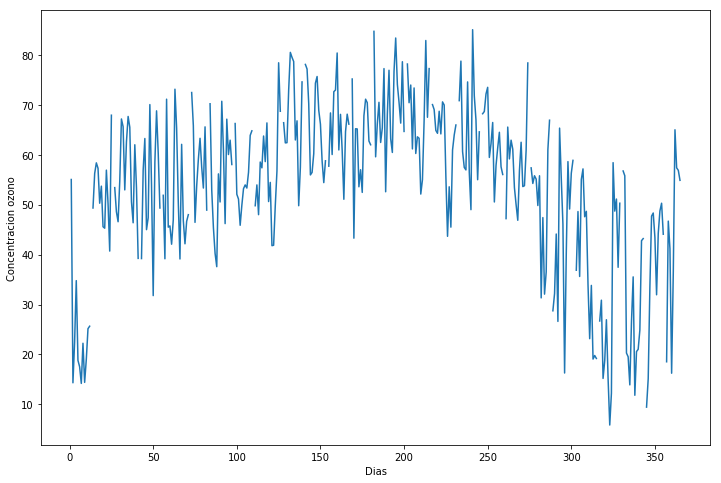

In [111]:
#Hacemos un plot
plt.plot(BurgosOzono2015['DIASANIO'],BurgosOzono2015['MEDIA'])
plt.xlabel('Dias')
# Ponemos etiqueta al eje x
plt.ylabel('Concentracion ozono')
# Cambiamos el tamaño de las figuras
fig_size = plt.rcParams["figure.figsize"]
# Cambiamos el tamaño de las figuras
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.show()

In [112]:
#Repetimos
rutaNO='NO_HH_2015.xlsx'
#Cargamos los datos
docOxidoNitrogeno2015=cargarExcel(rutaNO)

In [113]:
#Vemos como se llaman las hojas
print(docOxidoNitrogeno2015.sheetnames)

['Hoja1']


In [114]:
#Convertimos los datos a dataFrame
dataFrameOxidoNitrogeno2015 = convertirDataFrame(docOxidoNitrogeno2015,'Hoja1')

In [115]:
#Cogemos solo los datos de Burgos
BurgosOxidoNitrogeno2015=buscarEstacion(dataFrameOxidoNitrogeno2015,9,59,6)
#Calculamos la media diaria y la almacenamos
BurgosOxidoNitrogeno2015=calcularMedia(BurgosOxidoNitrogeno2015)

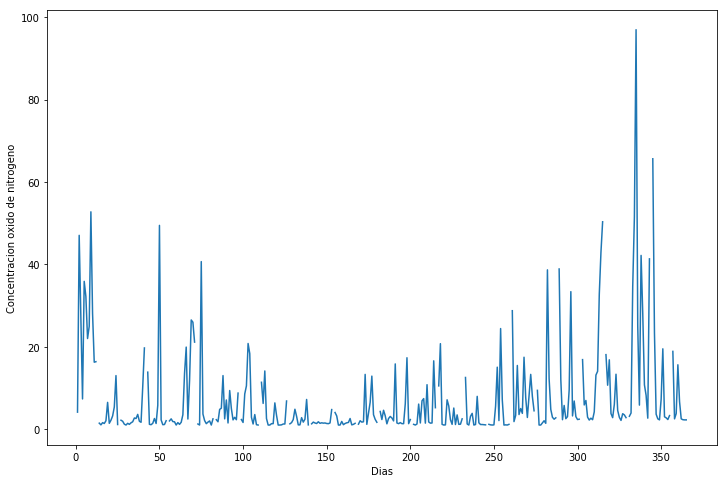

In [116]:
#Hacemos un plot
plt.plot(BurgosOxidoNitrogeno2015['DIASANIO'],BurgosOxidoNitrogeno2015['MEDIA'])
plt.xlabel('Dias')
# Ponemos etiqueta al eje x
plt.ylabel('Concentracion oxido de nitrogeno')
# Cambiamos el tamaño de las figuras
fig_size = plt.rcParams["figure.figsize"]
# Cambiamos el tamaño de las figuras
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.show()